In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from transform_data import get_train_test_ds

random_state = 42

In [2]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds('income', 'data/adult.data', random_state)
# X, X_train, X_test, y, y_train, y_test = get_train_test_ds('bank', 'data/bank.csv', random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [3]:
clf = DecisionTreeClassifier(random_state=random_state)
f1_scorer = make_scorer(f1_score)

In [4]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 8, 9, 16, 24, 32],
              'min_samples_leaf': [1, 2, 4, 8, 16, 17, 24, 32, 34],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [5]:
print("Best parameters:", grid_search.best_params_)

print("Train F1")
y_train_pred = best_model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print(train_f1_score)

print("Test F1")
y_test_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print(test_f1_score)

Best parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 17}
Train F1
0.719580359446212
Test F1
0.6689678978253366


income
```
Best parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 17}
Train F1
0.719580359446212
Test F1
0.6689678978253366
```

bank
```
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 34}
Train F1
0.6409122375201908
Test F1
0.6244875860468714
```

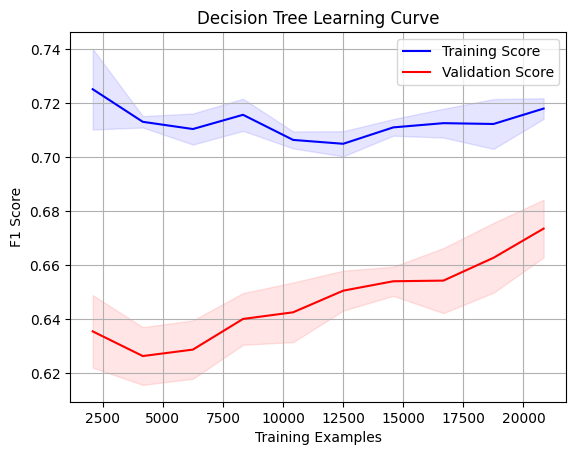

In [6]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=f1_scorer)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes_abs, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

[2, 4, 8, 9, 16, 24, 32]


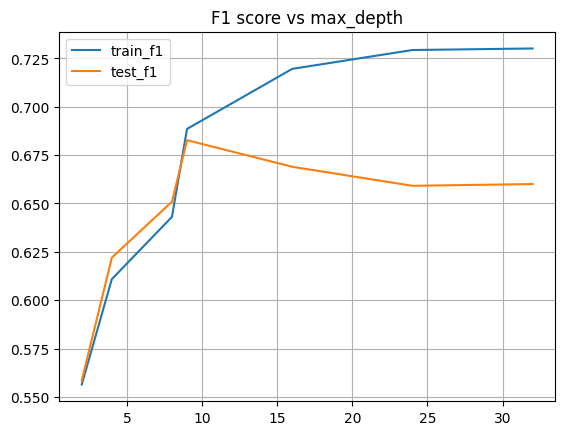

In [7]:
plot_param = 'max_depth'

param_list = param_grid[plot_param]
print(param_list)
train_f1_score_list = []
test_f1_score_list = []

for param in param_list:
    params = grid_search.best_params_.copy()
    params[plot_param] = param

    clf = DecisionTreeClassifier(random_state=random_state, **params)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_f1_score_list.append(f1_score(y_train, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_f1_score_list.append(f1_score(y_test, y_test_pred))

plot_df = pd.DataFrame({"train_f1": train_f1_score_list, "test_f1": test_f1_score_list}, index=param_list)

plot_df.plot()
plt.title("F1 score vs max_depth")
plt.grid()
plt.show()

In [8]:
%%time

params = grid_search.best_params_.copy()
clf = DecisionTreeClassifier(random_state=random_state, **params)
clf.fit(X_train, y_train)

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 138 ms


DecisionTreeClassifier(max_depth=16, min_samples_leaf=17, random_state=42)

In [9]:
%%time

y_test_pred = clf.predict(X_test)

CPU times: user 2.46 ms, sys: 0 ns, total: 2.46 ms
Wall time: 2.03 ms
